## 246 - Finding Temperature Inversions

[Youtube](https://www.youtube.com/watch?v=v7MWZB-kyoE)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import metpy.calc as mpcalc

In [2]:
from datetime import datetime
from scipy.signal import medfilt
from metpy.plots import SkewT
from metpy.units import units, pandas_dataframe_to_unit_arrays
from siphon.simplewebservice.wyoming import WyomingUpperAir

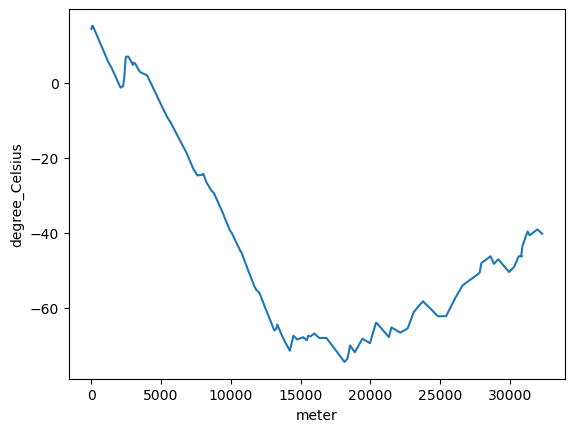

In [3]:
date = datetime(2021, 1, 16, 12)
station = 'TBW'
df = WyomingUpperAir.request_data(date, station)
df = pandas_dataframe_to_unit_arrays(df)

plt.plot(df['height'], df['temperature'])

In [4]:
df['lapse_rate'] = mpcalc.first_derivative(df['temperature'], x = df['height'])
df['lapse_rate'] = df['lapse_rate'].to('degC/kft')
df['lapse_rate']

Magnitude,[6.157575757575931 1.2315151515152947 -0.7125194805194704 -2.475811763723084 -2.6470508694875923 -2.5935440418192446 -2.610455192034086 -2.6960161927386226 -0.03585687053692936 -0.03276758718268841 -2.201497416987234 -2.5325074891194674 0.5831452891371824 0.8911200317967404 5.599563876183244 12.560552676541676 15.451047853515938 10.621818181818266 4.622823206944024 -1.3755110917791102 -2.0355398713898536 3.003444903204723 1.0259747545579543 -0.10223899371127157 -0.9558645204560523 -1.1343229813663795 -0.6017933375848411 -0.7146434670984126 -0.953882592417691 -2.3360754910018593 -2.3681881342701088 -1.9679546587865813 -1.9622746225445884 -2.192191905575333 -2.4799074589373307 -1.805668969586585 -1.730166073684772 -0.13554260089711645 0.010552082272697603 0.025198365353200098 0.42984615384611163 -0.7257142857143507 -3.0355604530149836 -2.624273728273674 -1.4715408140464235 -1.7222951294009676 -2.516964661473057 -2.9502506338051036 -3.0277901908013094 -1.783139446932238 -1.843468295379469 -2.399668482174569 -1.2685681032915517 -1.3374924757781594 -2.9804491125089876 -2.195303778863028 -1.6214585733274087 -1.8394852656975216 -2.625876190476161 -2.98458425475446 -2.259094863595588 -2.138717134218577 0.1182727392676833 3.5479168434006714 3.5737837200803053 -2.4831332563996424 -2.123777493712205 -2.0437097789910843 2.536881293143766 4.762296513461113 2.5311299061408454 -0.5306503764555529 -0.9146049593031554 -1.0531018352647024 1.9810234529960729 1.9881008573051708 0.2478686900130073 0.8886112541892787 0.4110649970184415 -0.13894017094020653 0.0 4.229949723821846e-15 -0.47145458385933586 -1.5274045304810109 0.47760934609549976 1.1723076923078233 2.4396340080973067 5.70582390875185 1.5486092078374585 -1.5581710375108055 0.08277486152151642 2.027773487919683 1.2592923688705182 2.9011904528297325 3.8882896426683002 0.4122295081970342 0.0 -0.1220594965672955 -1.3128330906356336 -1.3262850984847174 4.826923739719043 5.048226358898538 1.9092096505753458 -0.6472455167472043 -0.6721735307453484 0.21969454116427084 0.7260111733164408 0.7525421546163754 1.626896162773858 3.0354025284812747 1.4505828842301693 1.136739268360647 1.2636153005464092 1.2389419981647898 -2.1138485228966313 -2.2937053938945406 -1.0992786885245898 -1.1492459016393501 -1.1132579205013198 -0.8229931312010613 0.0 0.4203479236071491 2.2018004936837294 2.120585620488563 1.4301067962577512 0.8159245911524948 0.8494426229508225 0.8298940465919045 2.7456780487805688 3.1672695652173246 0.8866042730588958 0.8442981446438798 -1.7799086772300468 -2.458064516128979 -1.0896479230134206 -0.6447356180858116 -1.3293651201234205 -1.1284888663474346 -0.8078503697258508 2.1718007035961553 2.6273921404682423 1.5691974050045951 0.0 -3.3936494845362257 7.02547535783468 3.1910413895496776 0.5638430300350281 -1.3900633209345228 -1.0735087110824812 -1.214880985985228 -0.8656650891002663]
Units,delta_degree_Celsius/kilofoot


In [5]:
df['lapse_rate_3smooth'] = mpcalc.first_derivative(medfilt(df['temperature'], 3), x = df['height']).m * 1000
df['lapse_rate_3smooth'] = df['lapse_rate_3smooth'] * units('delta_degC/kilofoot')

df['lapse_rate_5smooth'] = mpcalc.first_derivative(medfilt(df['temperature'], 5), x = df['height']).m * 1000
df['lapse_rate_5smooth'] = df['lapse_rate_5smooth'] * units('delta_degC/kilofoot')

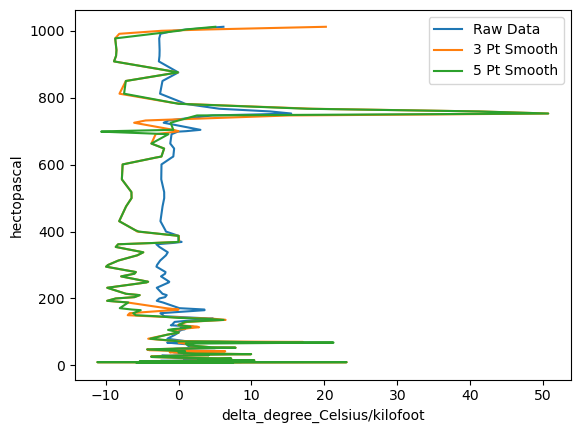

In [6]:
plt.plot(df['lapse_rate'], df['pressure'], label = 'Raw Data')
plt.plot(df['lapse_rate_3smooth'], df['pressure'], label = '3 Pt Smooth')
plt.plot(df['lapse_rate_5smooth'], df['pressure'], label = '5 Pt Smooth')
plt.legend()